In [11]:
import pandas as pd
import json

# Paths to my JSON files
files = ['/content/Streaming_History_Audio_2016-2020_0.json', '/content/Streaming_History_Audio_2020-2022_1.json', '/content/Streaming_History_Audio_2022-2023_2.json', '/content/Streaming_History_Audio_2023_3.json', '/content/Streaming_History_Video_2018-2020.json']


In [12]:
# Load each file
df_list = []
for file in files:
    try:
        with open(file, 'r') as f:
            # Load the entire file and then normalize the JSON data
            data = json.load(f)
            normalized_df = pd.json_normalize(data)
            df_list.append(normalized_df)
    except ValueError as e:
        print(f"Error loading {file}: {e}")

# Concatenate all DataFrames into one
df = pd.concat(df_list, ignore_index=True)

# Explore the first few rows of the DataFrame
print(df.head())

# Print column names to verify the presence of 'ts'
print("Column names in the DataFrame:")
print(df.columns)

# Data Cleaning
# Check if 'ts' column exists and convert it to datetime
if 'ts' in df.columns:
    df['ts'] = pd.to_datetime(df['ts'])
else:
    print("Column 'ts' not found in DataFrame")

# Convert 'ms_played' to minutes, if the column exists
if 'ms_played' in df.columns:
    df['minutes_played'] = df['ms_played'] / 60000
else:
    print("Column 'ms_played' not found in DataFrame")

# Drop unnecessary columns to maintain privacy and focus on relevant data
columns_to_drop = ['Ip_addr_decrypted', 'user_agent_decrypted']
df = df.drop(columns_to_drop, axis=1, errors='ignore')

# Handle missing values
df.fillna('Unknown', inplace=True)

# Data Preparation (if 'ts' column exists)
if 'ts' in df.columns:
    # Extracting date and time components
    df['hour'] = df['ts'].dt.hour
    df['day'] = df['ts'].dt.day_name()
    df['month'] = df['ts'].dt.month_name()

# Display the cleaned DataFrame
print(df.head())


                     ts    username              platform  ms_played  \
0  2016-12-25T09:36:34Z  elifgodusg  iOS 10.1.1 (iPad4,1)      46045   
1  2016-12-25T09:36:35Z  elifgodusg  iOS 10.1.1 (iPad4,1)        696   
2  2016-12-25T09:37:24Z  elifgodusg  iOS 10.1.1 (iPad4,1)      47020   
3  2016-12-25T09:39:14Z  elifgodusg  iOS 10.1.1 (iPad4,1)     109969   
4  2016-12-25T09:39:20Z  elifgodusg  iOS 10.1.1 (iPad4,1)       6454   

  conn_country ip_addr_decrypted user_agent_decrypted  \
0           TR              None                 None   
1           TR              None                 None   
2           TR              None                 None   
3           TR              None                 None   
4           TR              None                 None   

  master_metadata_track_name master_metadata_album_artist_name  \
0                 California                      Robert Ellis   
1                  Mad World                        Gary Jules   
2         Fake Plastic Tre

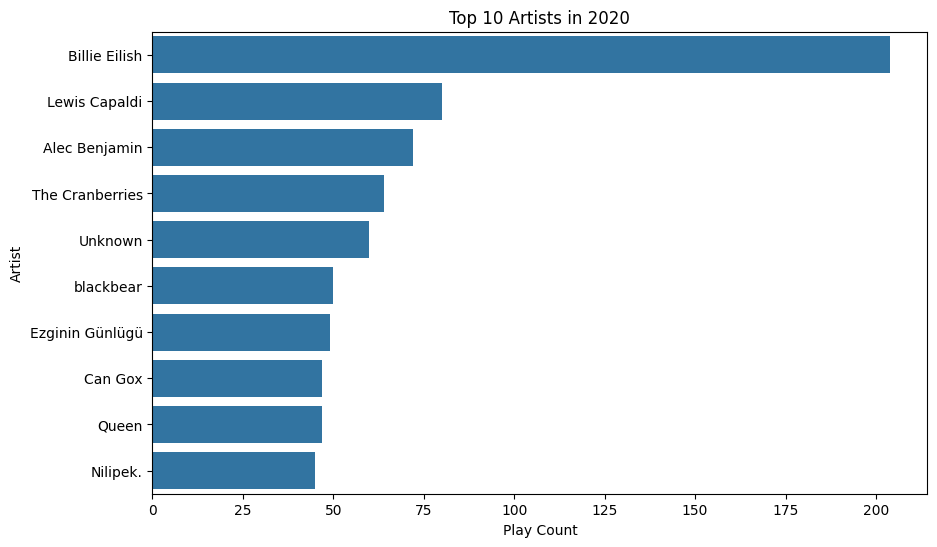

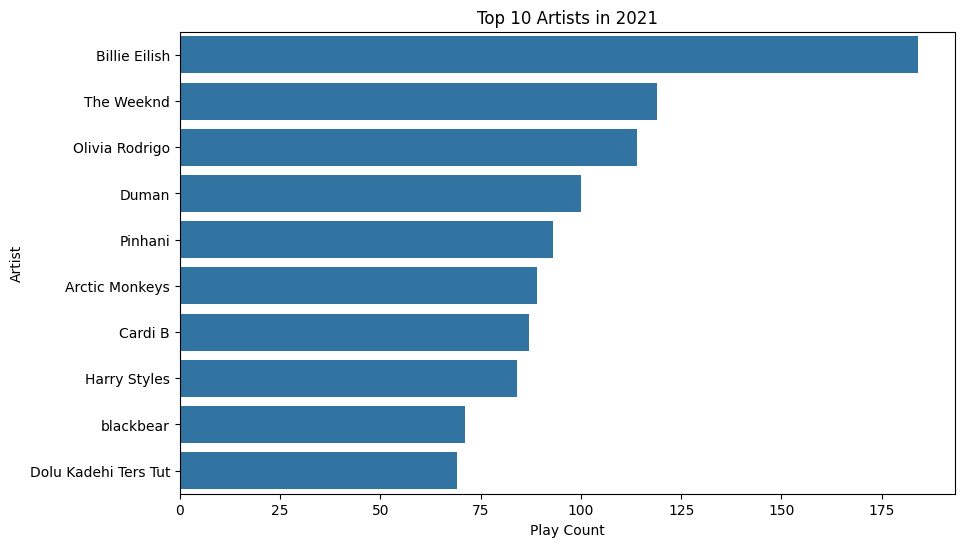

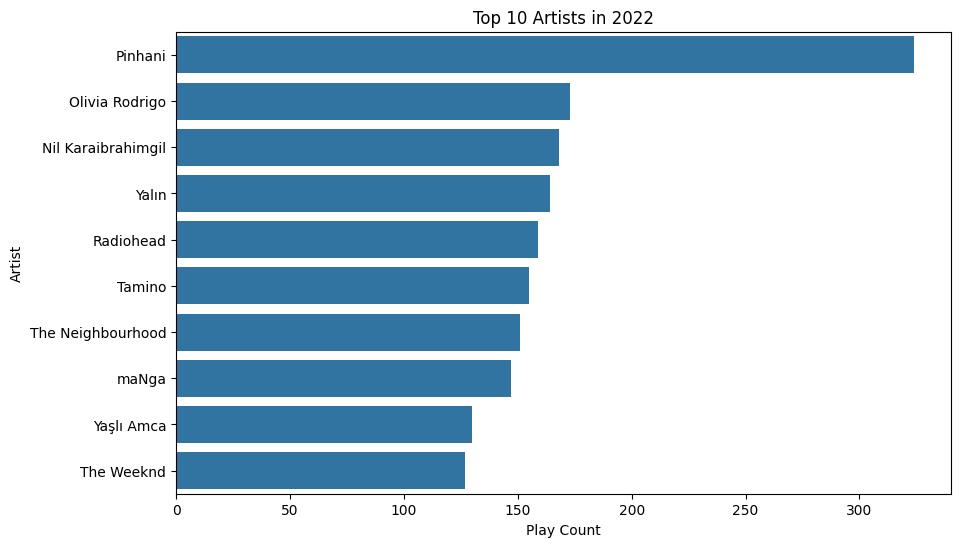

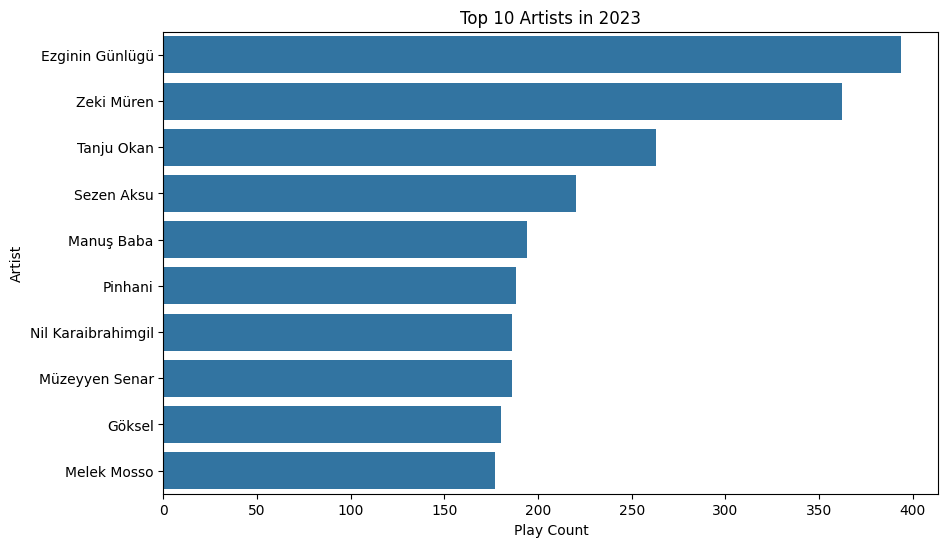

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Extract year from the timestamp
df['year'] = df['ts'].dt.year

# Define the years of interest
years_of_interest = [2020, 2021, 2022, 2023]

for year in years_of_interest:
    # Filter data for the specific year
    df_year = df[df['year'] == year]

    # Top 10 Artists for the year
    top_artists = df_year['master_metadata_album_artist_name'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_artists.values, y=top_artists.index)
    plt.xlabel('Play Count')
    plt.ylabel('Artist')
    plt.title(f'Top 10 Artists in {year}')
    plt.show()

<ipython-input-18-dcd38e8d8c33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['year'] = historical_data['ts'].dt.year


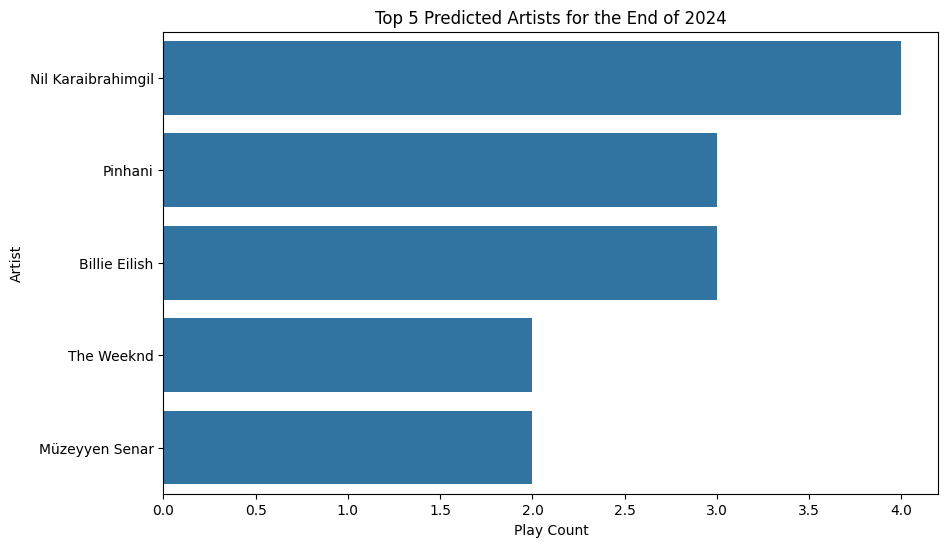

Top 5 Predicted Artists for the End of 2024:
Nil Karaibrahimgil    4
Pinhani               3
Billie Eilish         3
The Weeknd            2
Müzeyyen Senar        2
dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the years 2017 to 2023
historical_data = df[(df['ts'].dt.year >= 2017) & (df['ts'].dt.year <= 2023)]

# Extract year from the timestamp
historical_data['year'] = historical_data['ts'].dt.year

# Define the years of interest, including 2024
years_of_interest = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Initialize a dictionary to store top artists for each year
top_artists_by_year = {}

for year in years_of_interest:
    # Filter data for the specific year
    df_year = historical_data[historical_data['year'] == year]

    # Top 10 Artists for the year
    top_artists = df_year['master_metadata_album_artist_name'].value_counts().head(10)

    # Store the top artists for the current year
    top_artists_by_year[year] = top_artists.index.tolist()

# Predict top artists for 2024 by combining top artists from previous years
predicted_top_artists_2024 = []

for year in years_of_interest:
    predicted_top_artists_2024.extend(top_artists_by_year[year])

# Calculate the top 5 predicted artists for 2024 based on popularity
top_artists_2024 = pd.Series(predicted_top_artists_2024).value_counts().head(5)

# Plot the top artists for 2024
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_2024.values, y=top_artists_2024.index)
plt.xlabel('Play Count')
plt.ylabel('Artist')
plt.title('Top 5 Predicted Artists for the End of 2024')
plt.show()

# Print the top 5 predicted artists for 2024
print("Top 5 Predicted Artists for the End of 2024:")
print(top_artists_2024)


<ipython-input-4-41eef0cdef8c>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_activity = olivia_df.groupby(olivia_df['ts'].dt.to_period('M'))['minutes_played'].sum()


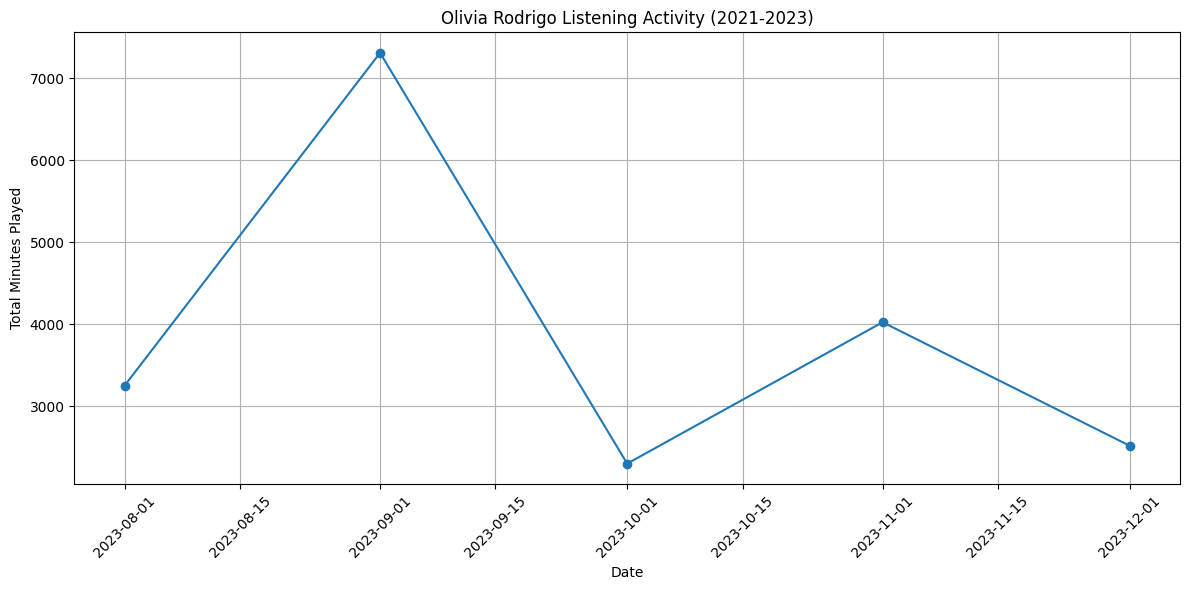

In [4]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'ts' column representing timestamps and 'minutes_played' column
# Filter the data for Olivia Rodrigo songs from 2021 to 2023
olivia_df = df[(df['ts'].dt.year >= 2021) & (df['ts'].dt.year <= 2023)]

# Group the data by month and calculate the total minutes played each month
monthly_activity = olivia_df.groupby(olivia_df['ts'].dt.to_period('M'))['minutes_played'].sum()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_activity.index.to_timestamp(), monthly_activity.values, marker='o', linestyle='-')
plt.title('Olivia Rodrigo Listening Activity (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Total Minutes Played')
plt.grid(True)

# Format x-axis date labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


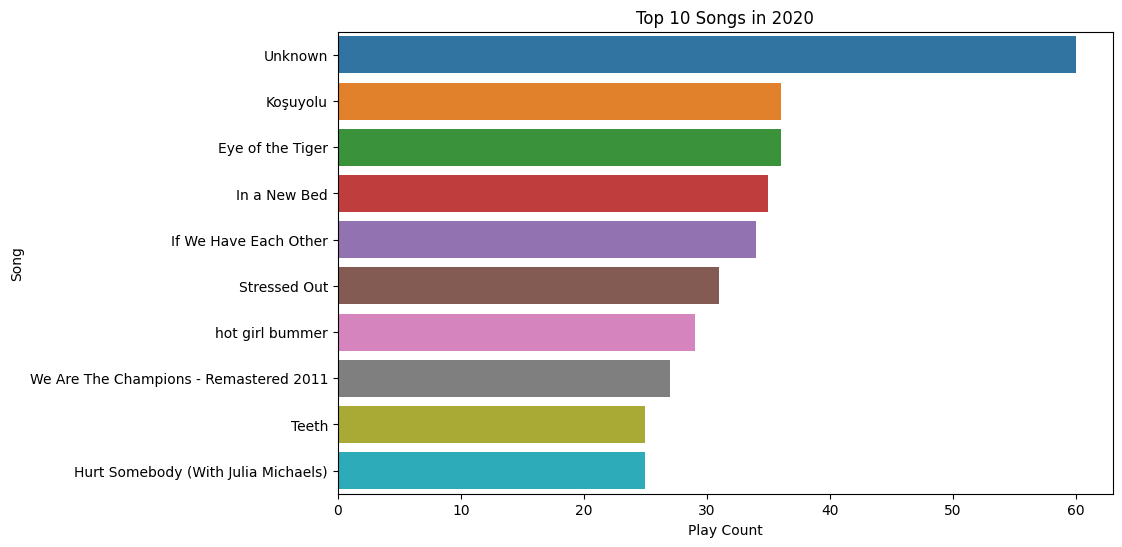

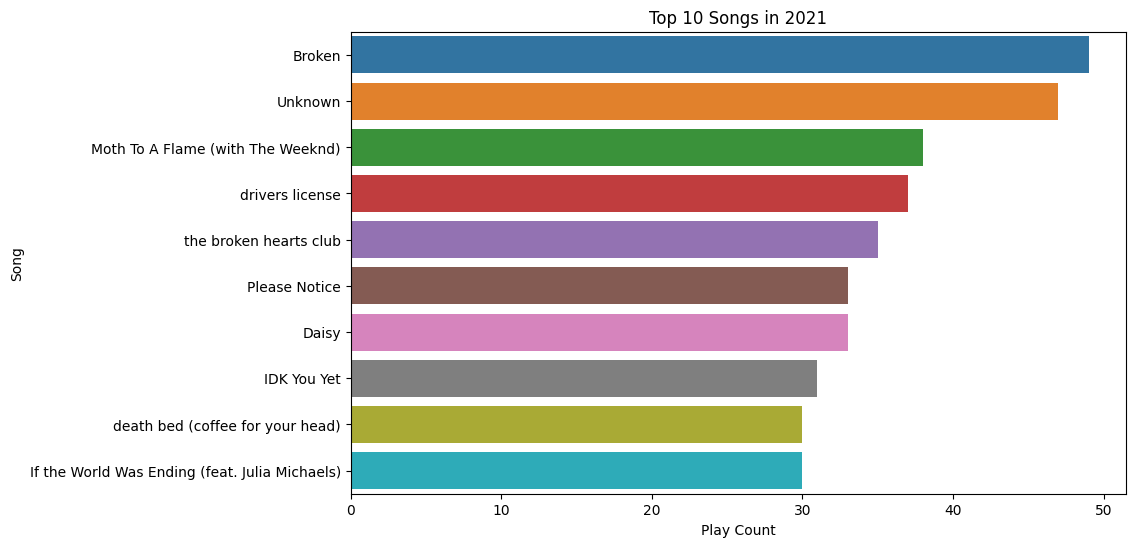

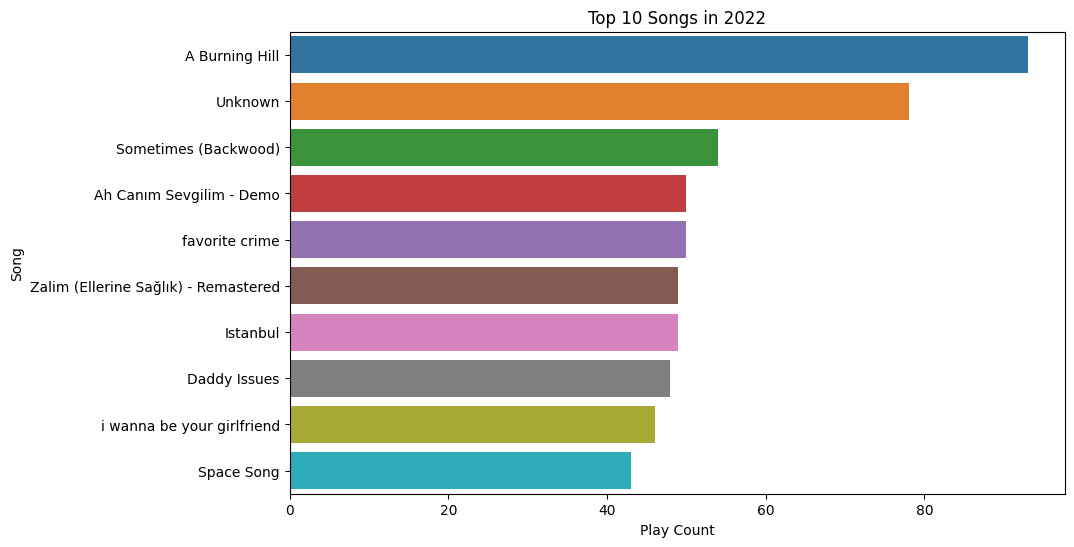

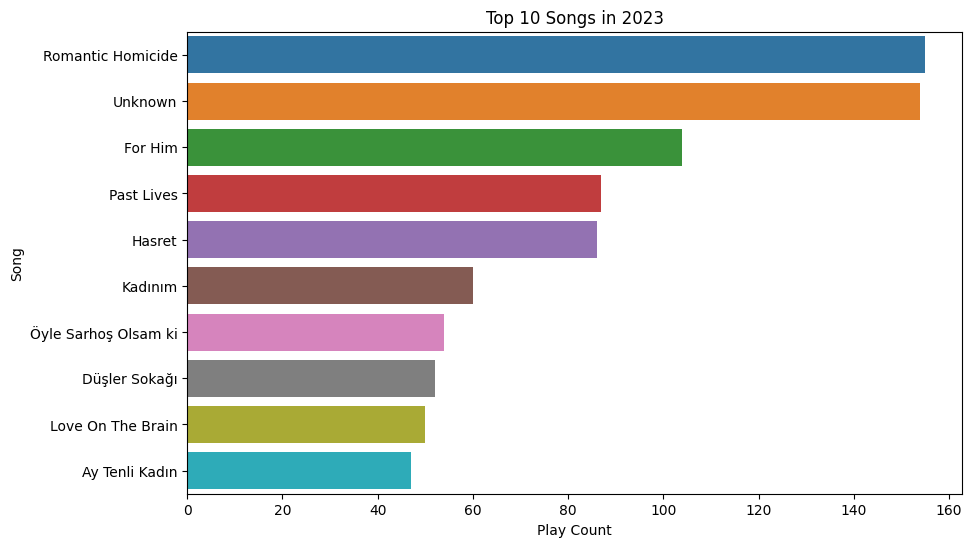

In [ ]:
# Extract year from the timestamp
df['year'] = df['ts'].dt.year

# Define the years of interest
years_of_interest = [2020, 2021, 2022, 2023]

for year in years_of_interest:
    # Filter data for the specific year
    df_year = df[df['year'] == year]

    # Top 10 Songs for the year
    top_songs = df_year['master_metadata_track_name'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_songs.values, y=top_songs.index)
    plt.xlabel('Play Count')
    plt.ylabel('Song')
    plt.title(f'Top 10 Songs in {year}')
    plt.show()


<ipython-input-20-b7a174e02a1f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['year'] = historical_data['ts'].dt.year


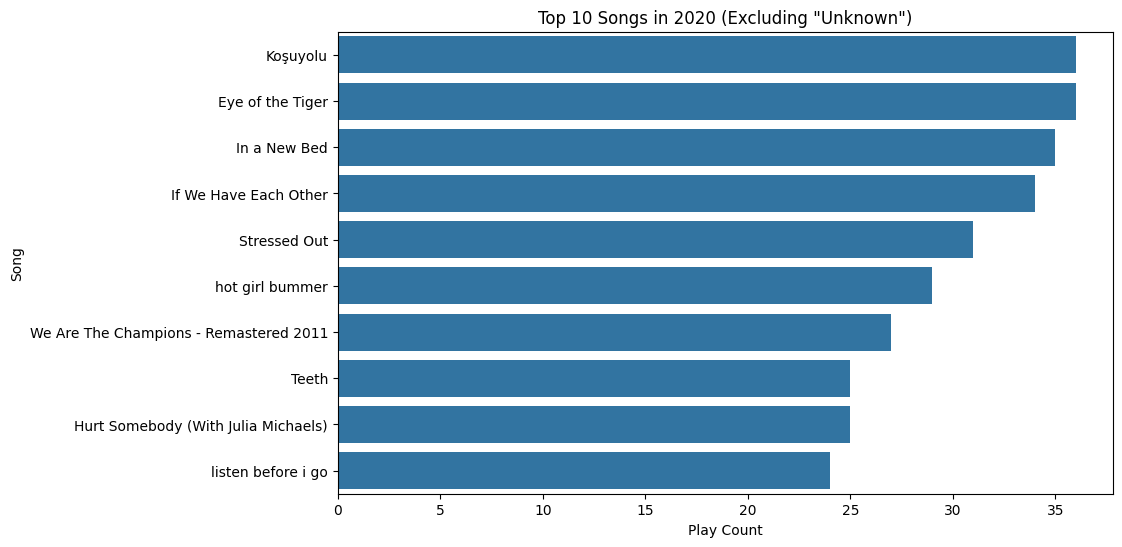

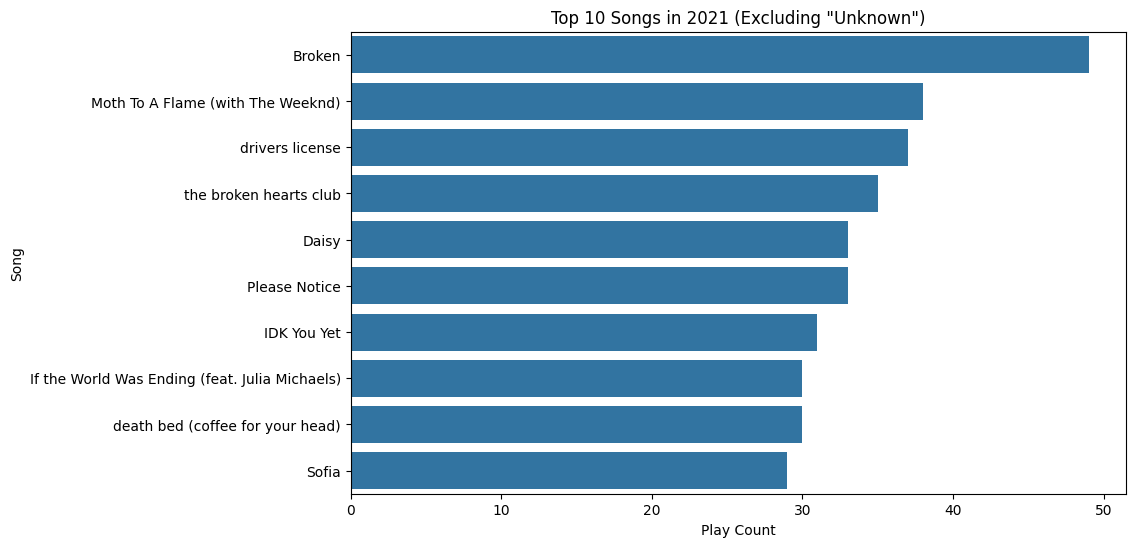

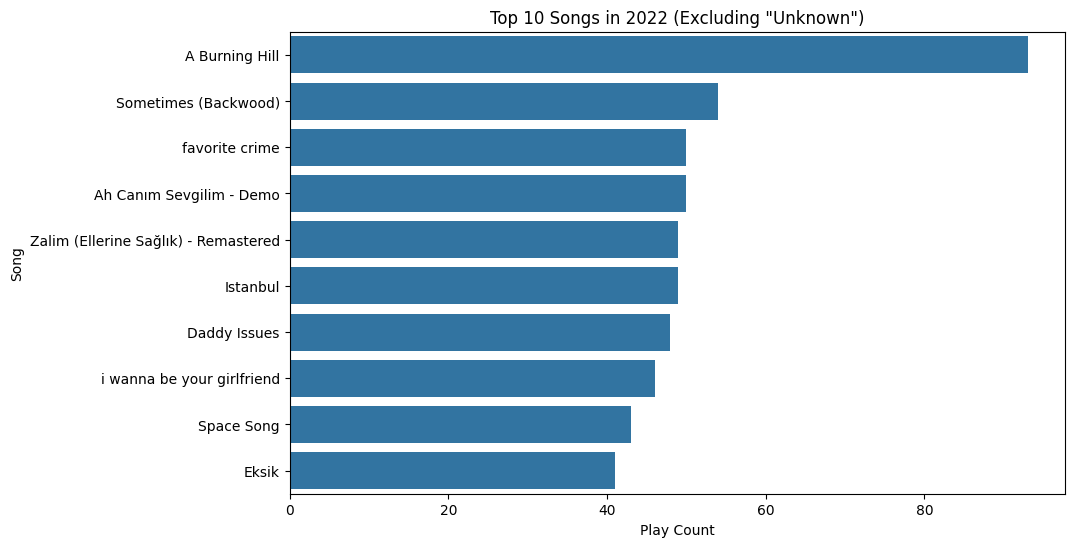

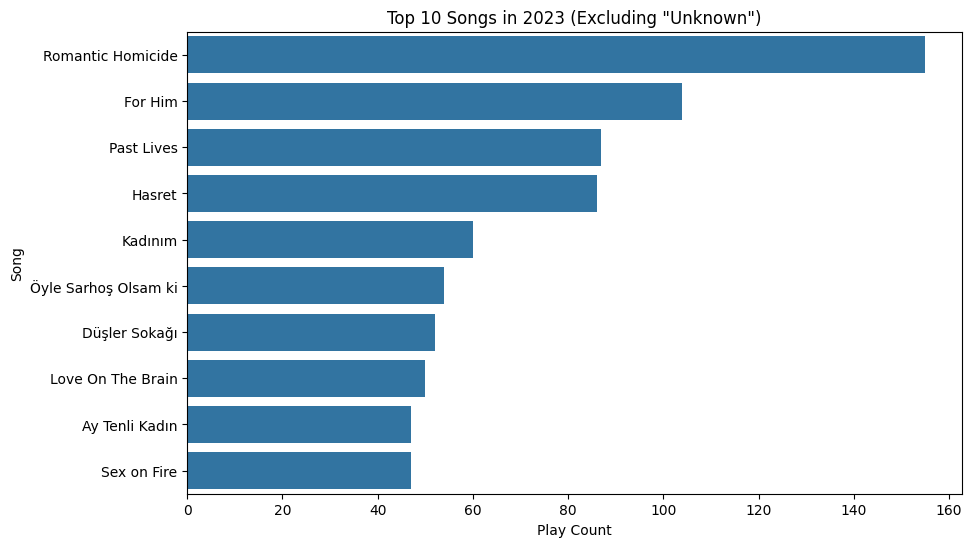

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the years 2020 to 2023
historical_data = df[(df['ts'].dt.year >= 2020) & (df['ts'].dt.year <= 2023)]

# Extract year from the timestamp
historical_data['year'] = historical_data['ts'].dt.year

# Define the years of interest
years_of_interest = [2020, 2021, 2022, 2023]

for year in years_of_interest:
    # Filter data for the specific year and exclude rows with 'Unknown' in the song title
    df_year = historical_data[(historical_data['year'] == year) & (historical_data['master_metadata_track_name'] != 'Unknown')]

    # Top 10 Songs for the year
    top_songs = df_year['master_metadata_track_name'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_songs.values, y=top_songs.index)
    plt.xlabel('Play Count')
    plt.ylabel('Song')
    plt.title(f'Top 10 Songs in {year} (Excluding "Unknown")')
    plt.show()


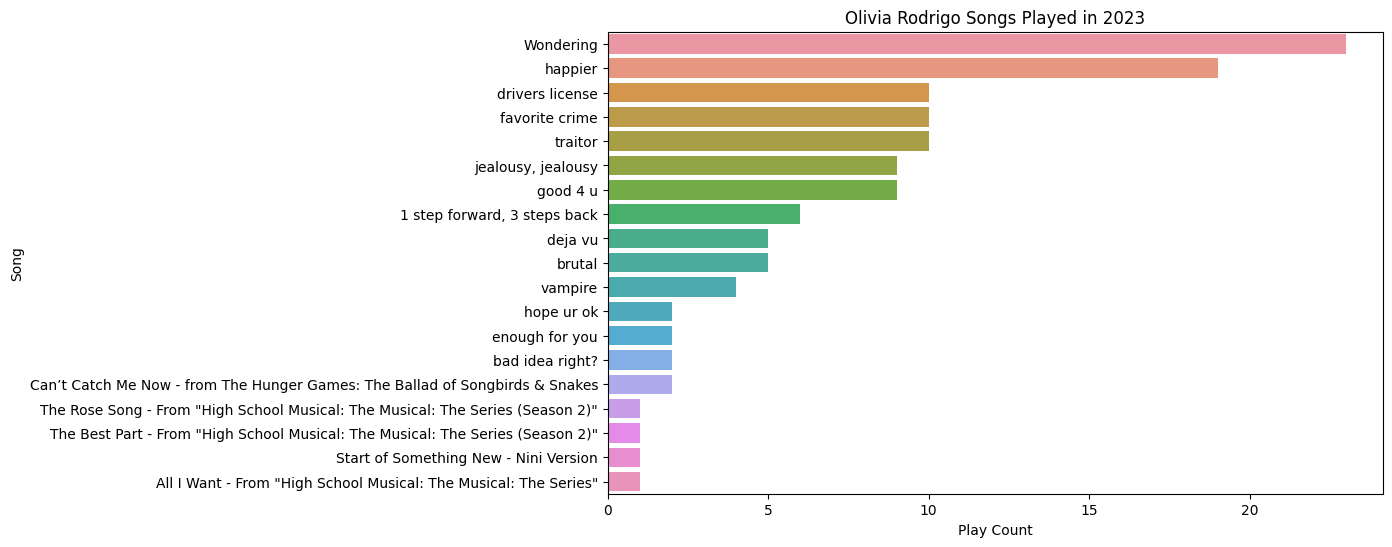

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Olivia Rodrigo songs in 2023
olivia_2023 = df[(df['master_metadata_album_artist_name'] == 'Olivia Rodrigo') & (df['year'] == 2023)]

# Count how many times each song was played
song_counts = olivia_2023['master_metadata_track_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=song_counts.values, y=song_counts.index)
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.title('Olivia Rodrigo Songs Played in 2023')
plt.show()


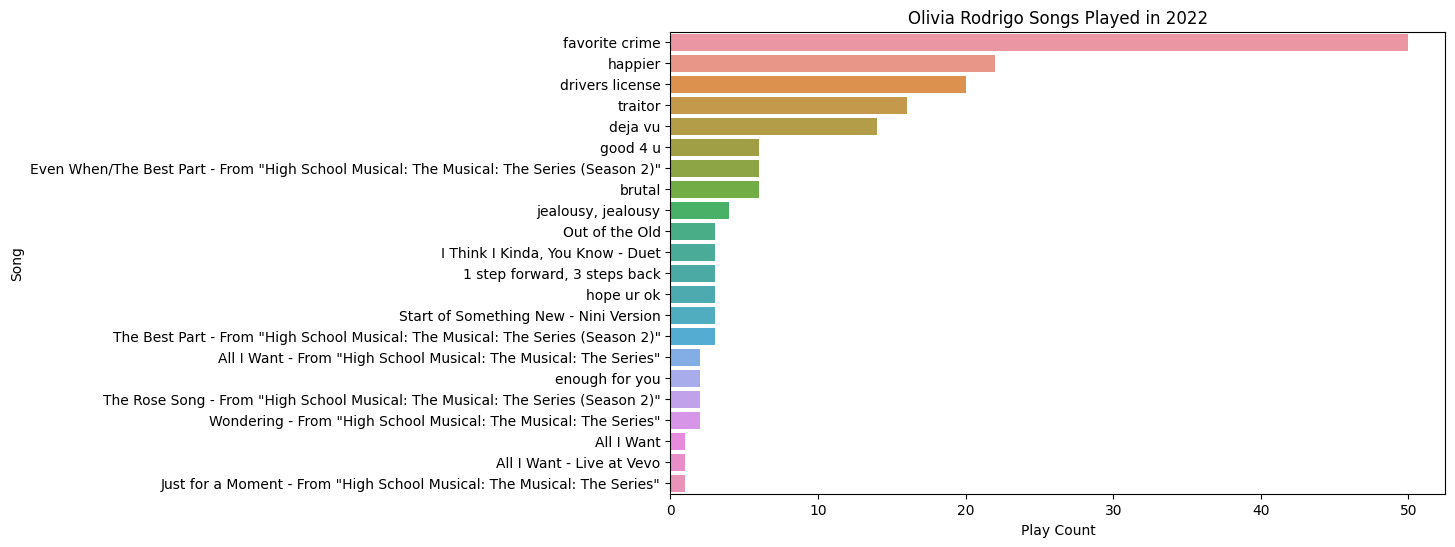

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Olivia Rodrigo songs in 2022
olivia_2022 = df[(df['master_metadata_album_artist_name'] == 'Olivia Rodrigo') & (df['year'] == 2022)]

# Count how many times each song was played
song_counts_2022 = olivia_2022['master_metadata_track_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=song_counts_2022.values, y=song_counts_2022.index)
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.title('Olivia Rodrigo Songs Played in 2022')
plt.show()


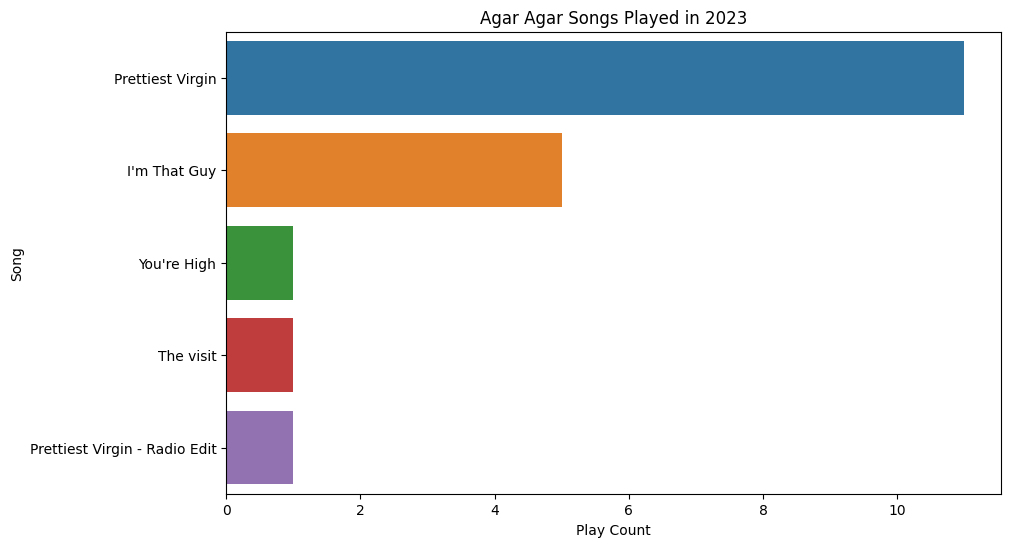

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Agar Agar songs in 2023
agar_agar_2023 = df[(df['master_metadata_album_artist_name'] == 'Agar Agar') & (df['year'] == 2023)]

# Count how many times each song was played
song_counts_agar_agar_2023 = agar_agar_2023['master_metadata_track_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=song_counts_agar_agar_2023.values, y=song_counts_agar_agar_2023.index)
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.title('Agar Agar Songs Played in 2023')
plt.show()


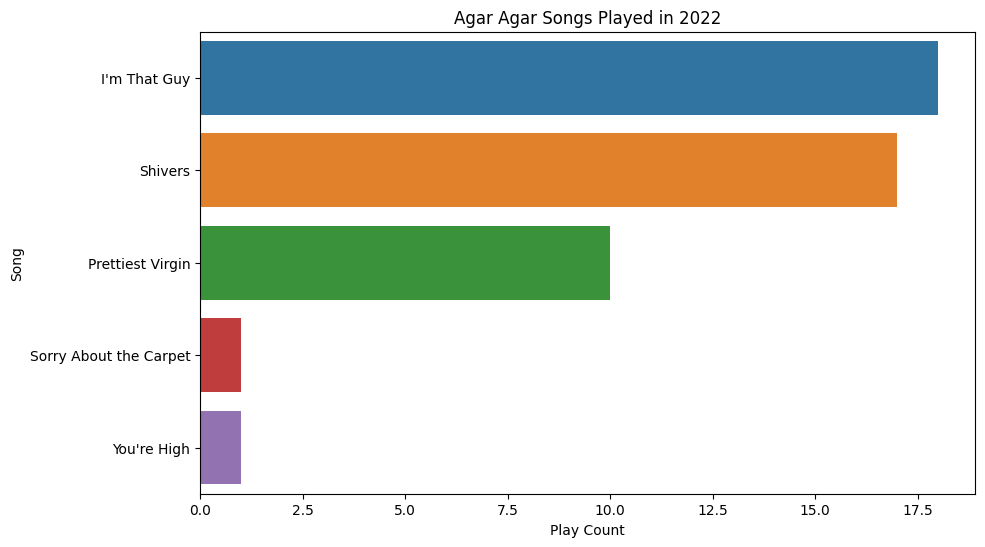

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Agar Agar songs in 2022
agar_agar_2022 = df[(df['master_metadata_album_artist_name'] == 'Agar Agar') & (df['year'] == 2022)]

# Count how many times each song was played
song_counts_agar_agar_2022 = agar_agar_2022['master_metadata_track_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=song_counts_agar_agar_2022.values, y=song_counts_agar_agar_2022.index)
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.title('Agar Agar Songs Played in 2022')
plt.show()


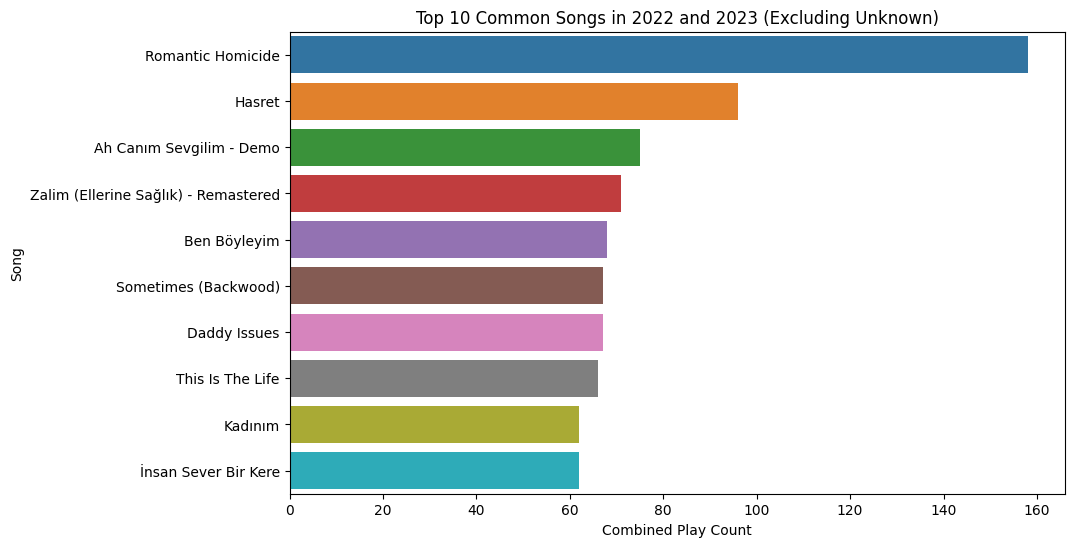

In [ ]:
# Exclude rows where the song name is 'Unknown' or empty
data_2022_filtered = data_2022[data_2022['master_metadata_track_name'] != 'Unknown']
data_2023_filtered = data_2023[data_2023['master_metadata_track_name'] != 'Unknown']

# Count song plays for each year (filtered data)
song_counts_2022_filtered = data_2022_filtered['master_metadata_track_name'].value_counts()
song_counts_2023_filtered = data_2023_filtered['master_metadata_track_name'].value_counts()

# Identify common songs in both years
common_songs_filtered = song_counts_2022_filtered.index.intersection(song_counts_2023_filtered.index)

# Combine counts for common songs
combined_counts_filtered = song_counts_2022_filtered[common_songs_filtered] + song_counts_2023_filtered[common_songs_filtered]

# Get the top 10 songs
top_10_common_songs_filtered = combined_counts_filtered.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_common_songs_filtered.values, y=top_10_common_songs_filtered.index)
plt.xlabel('Combined Play Count')
plt.ylabel('Song')
plt.title('Top 10 Common Songs in 2022 and 2023 (Excluding Unknown)')
plt.show()

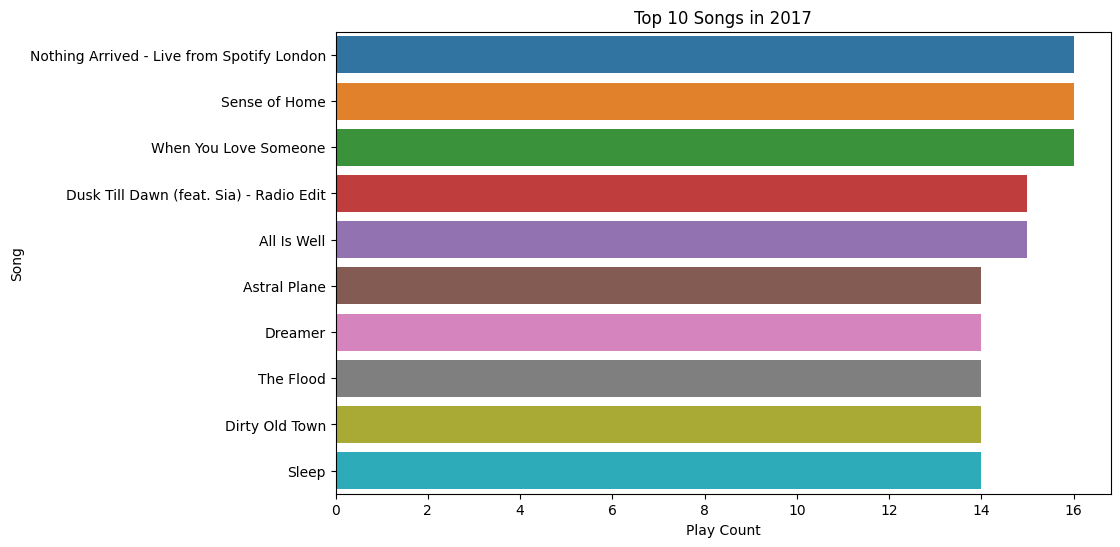

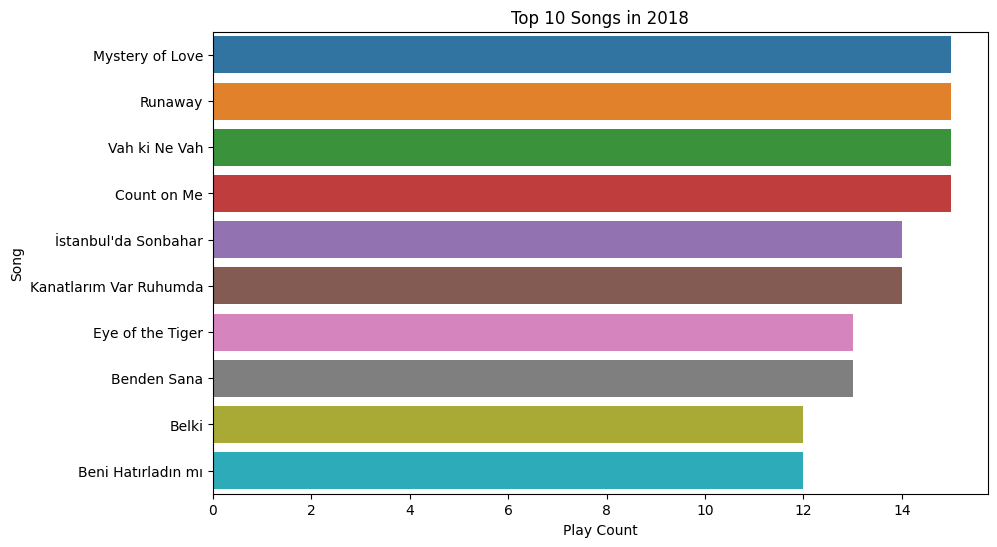

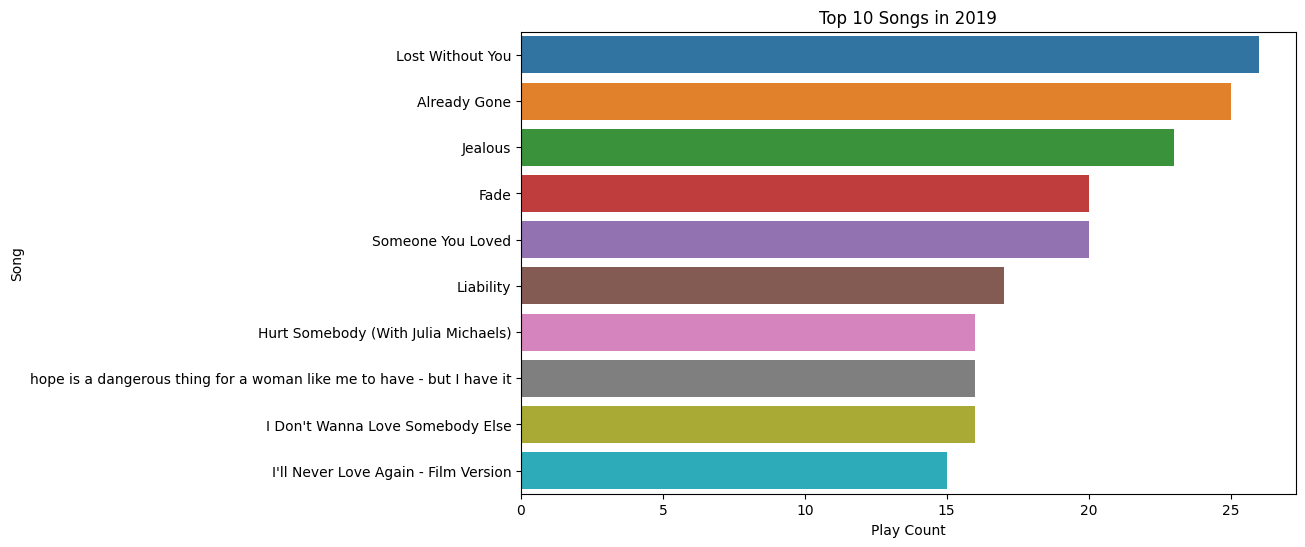

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the years of interest
years_of_interest = [2017, 2018, 2019]

for year in years_of_interest:
    # Filter data for the specific year
    df_year = df[df['year'] == year]

    # Count how many times each song was played
    top_songs = df_year['master_metadata_track_name'].value_counts().head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_songs.values, y=top_songs.index)
    plt.xlabel('Play Count')
    plt.ylabel('Song')
    plt.title(f'Top 10 Songs in {year}')
    plt.show()


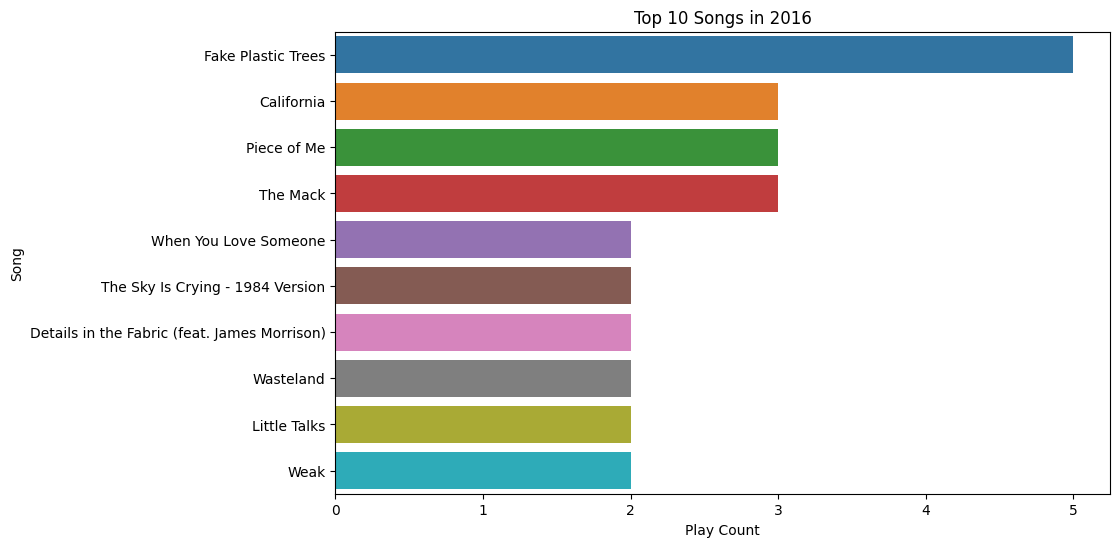

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Count how many times each song was played
top_songs_2016 = df_2016['master_metadata_track_name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_songs_2016.values, y=top_songs_2016.index)
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.title('Top 10 Songs in 2016')
plt.show()


In [ ]:
# Filter data for the year 2023
df_2023 = df[df['year'] == 2023]

# Count the number of unique songs
unique_songs_2023 = df_2023['master_metadata_track_name'].nunique()

print(f"Number of unique songs listened to in 2023: {unique_songs_2023}")


Number of unique songs listened to in 2023: 4498


In [ ]:
# Years of interest
years = [2022, 2021, 2020, 2019, 2018, 2017, 2016]

# Iterate through each year and count unique songs
unique_songs_per_year = {}
for year in years:
    df_year = df[df['year'] == year]
    unique_songs = df_year['master_metadata_track_name'].nunique()
    unique_songs_per_year[year] = unique_songs

# Display the results
for year, count in unique_songs_per_year.items():
    print(f"Number of unique songs listened to in {year}: {count}")


Number of unique songs listened to in 2022: 3373
Number of unique songs listened to in 2021: 3527
Number of unique songs listened to in 2020: 1691
Number of unique songs listened to in 2019: 1397
Number of unique songs listened to in 2018: 2676
Number of unique songs listened to in 2017: 3321
Number of unique songs listened to in 2016: 148


In [ ]:
# Filter data for the year 2023
df_2023 = df[df['year'] == 2023]

# Count the total number of songs listened to in 2023 (including repeats)
total_songs_2023 = df_2023.shape[0]

print(f"Total number of songs listened to in 2023: {total_songs_2023}")


Total number of songs listened to in 2023: 17877


In [ ]:
# Filter data for the year 2023
df_2023 = df[df['year'] == 2023]

# Find the most played song of 2023
top_song_2023 = df_2023['master_metadata_track_name'].value_counts().idxmax()

# Count how many times the top song was played in 2023
play_count_top_song_2023 = df_2023['master_metadata_track_name'].value_counts().max()

print(f"The top song in 2023 was '{top_song_2023}' and it was played {play_count_top_song_2023} times.")


The top song in 2023 was 'Romantic Homicide' and it was played 155 times.


In [21]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162670 sha256=0bcedade3726ee4260afc9225881fcc1385d0439a460a8fc6e31a1c82689ced5
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [27]:
# Print column names
print(df.columns)


Index(['song', 'artist', 'song_artist'], dtype='object')
